## Optional Exercise 5: XOR PROBLEM  
  
Following the notebook S3_XOR_template.ipynb:
1) Create a neural net with topology 2 – 2 – 1 to solve the problem.
2) Once converged, plot the boundaries over the scatter plot of the data.

In [31]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers

### The XOR data


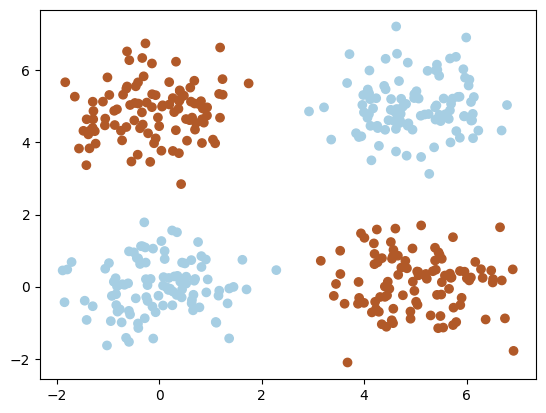

In [32]:
# We create four blobs with different centers to create the original data
centers = ([0, 0], [0, 5], [5, 0], [5, 5])
X, y = datasets.make_blobs(n_samples=400, centers = centers, cluster_std=0.8)
# Reduce the classes to two classe simulating the XOR problem 
y[y == 3] = 0
y[y == 2] = 1
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

### Neural Network

In [33]:
neural_network = tf.keras.Sequential([
    layers.Input(shape = (2,), name = "Input"),
    layers.Dense(2, activation = "relu", name = "Hidden_Layer"),
    layers.Dense(1, activation = "sigmoid", name = "Output")]
)

In [34]:
neural_network.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer (Dense)            │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
neural_network.compile(
    optimizer = "SGD",
    loss = "binary_crossentropy",
    metrics = ['accuracy']
)

### Training With Early Stopping

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor = "val_loss",
    patience=15, 
    restore_best_weights = True
)

history = neural_network.fit(
    X, y,
    epochs=200,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6032 - loss: 1.0757 - val_accuracy: 0.4500 - val_loss: 0.7448
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4552 - loss: 0.7427 - val_accuracy: 0.5000 - val_loss: 0.7323
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5790 - loss: 0.7256 - val_accuracy: 0.5750 - val_loss: 0.7327
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6283 - loss: 0.7124 - val_accuracy: 0.6250 - val_loss: 0.7329
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7388 - loss: 0.7018 - val_accuracy: 0.6125 - val_loss: 0.7255
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6460 - loss: 0.7186 - val_accuracy: 0.6375 - val_loss: 0.7254
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6886 - loss: 0.7082 - val_accuracy: 0.6375 - val_loss: 0.7267
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7176 - loss: 0.6997 - val_accuracy: 0.63

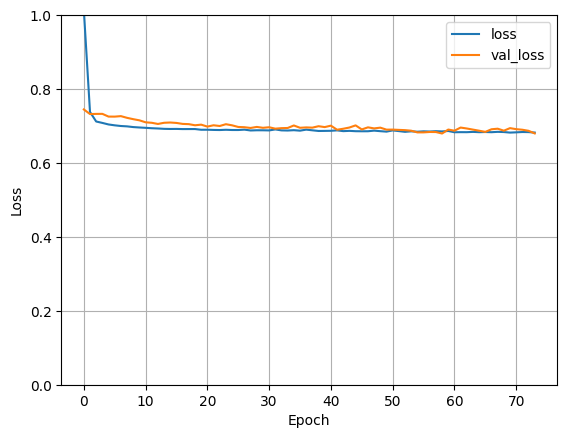

In [37]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
plot_loss(history)

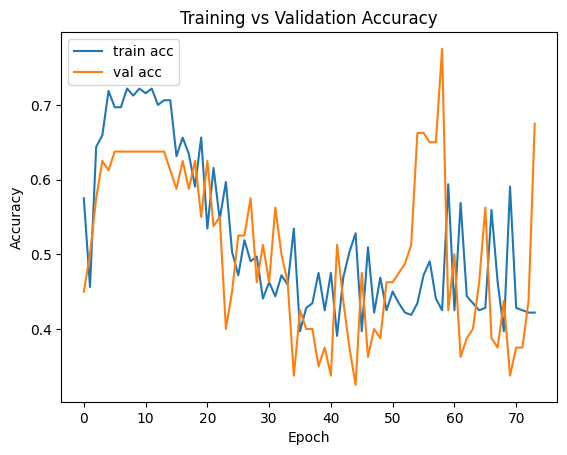

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

### Plotting Boundaries

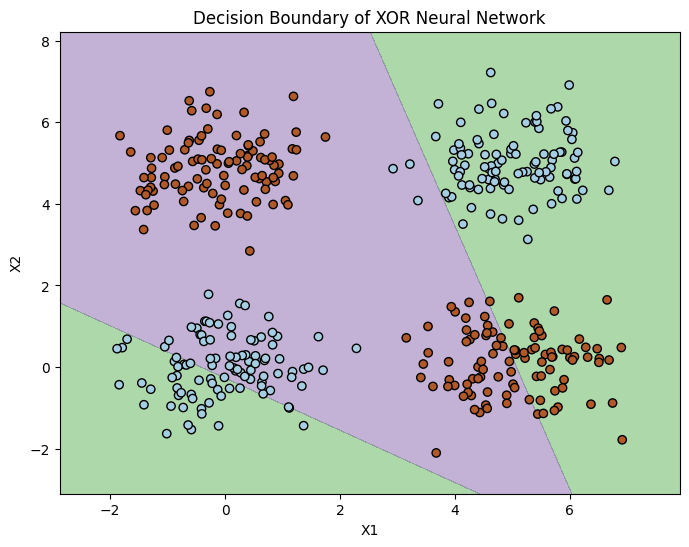

In [39]:
import numpy as np
# Create a grid of points over the input feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Flatten the grid and stack as input for prediction
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict probabilities for each point on the grid
preds = neural_network.predict(grid, verbose=0).reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.4, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Decision Boundary of XOR Neural Network")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [40]:
plt.figure(figsize=(8, 6))

# Plot only the decision boundary (black line where prediction = 0.5)
plt.contour(xx, yy, probs, levels=[0.5], colors='black', linewidths=2)

# Plot the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

plt.title("Decision Boundary of Neural Network (XOR-like Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

NameError: name 'probs' is not defined

<Figure size 800x600 with 0 Axes>